<h1 style="color:purple" align="center">Outliers :</h1>

<h4 style="color:blue" align="center">In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.

<h2 style="color:purple" >What is percentile ?

<h2 style="color:blue" >Percentile: the value below which a percentage of data falls.
    
<h3 style="color:blue" >example, the 50th percentile (the median) is the score below which 50% (exclusive) or at or below which (inclusive) 50% of the scores in the distribution may be found.

The percentile (or percentile score) and the percentile rank are related terms

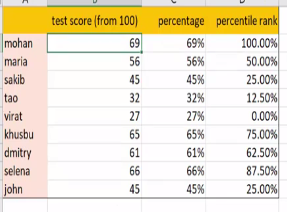

In [88]:
import pandas as pd

In [89]:
df = pd.read_csv(r'data2.csv',usecols=['Height'])
df.head(5)

,Height
0,1.47
1,1.50
2,1.52
3,1.55
4,1.57


In [91]:
df.Height.max()

1.83

##  In pandas we use quantile to get percentile 

<h3 style="color:blue">Pandas dataframe.quantile() function return values at the given quantile over requested axis, a numpy.percentile.

In [90]:
max_thresold_ht  = df['Height'].quantile(0.95)
max_thresold_ht
# Max thresold means if a point contain value above this that that will be consider as an outlier

1.8090000000000002

In [93]:
df[df['Height']>max_thresold_ht]

,Height
14,1.83


In [94]:
min_thresold_ht = df['Height'].quantile(0.05)
min_thresold_ht

1.4909999999999999

In [95]:
df[df['Height']<min_thresold_ht]

,Height
0,1.47


## so lets remove outliers from data

In [97]:
# Data without outliers
df[(df['Height']>max_thresold_ht) & (df['Height']<min_thresold_ht)]

,Height


In [98]:
# Data without outliers
df[(df['Height']<max_thresold_ht) & (df['Height']>min_thresold_ht)]

,Height
1,1.50
2,1.52
3,1.55
4,1.57
5,1.60
6,1.63
7,1.65
8,1.68
9,1.70
10,1.73


In [99]:
df_new = df[(df['Height']<max_thresold_ht) & (df['Height']>min_thresold_ht)]

In [100]:
df_new.shape

(13, 1)

In [101]:
df.shape

(15, 1)

#  another data

In [1]:
import pandas as pd

In [2]:
# df = pd.read_csv(r"Bengaluru_House_Data.csv",usecols=['location','size','total_sqft','price'])
# df.head(5)

In [3]:
df = pd.read_csv(r"Bengaluru_House_Data.csv")
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.total_sqft.values

array(['1056', '2600', '1440', ..., '1141', '4689', '550'], dtype=object)

In [5]:
df.shape

(13320, 9)

In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

<h3 style="color:green" > Here i am dropping 'Society' column because it is containing too much Nan values.

In [7]:
df=df.drop('society',axis=1)
df.head(4)


,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   total_sqft    13320 non-null  object 
 5   bath          13247 non-null  float64
 6   balcony       12711 non-null  float64
 7   price         13320 non-null  float64
dtypes: float64(3), object(5)
memory usage: 832.6+ KB


In [9]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price'],
      dtype='object')

In [10]:
df.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [11]:
def unique_values(df):
    for i in df.columns:
        if  i == 'total_sqft' or i== 'price':
            continue
        else:
            l=df[i].unique()
            ll=len(l)
        print(f"{i} : {l}")
        print("No of Categories : ",ll)
        print()
unique_values(df)

area_type : ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
No of Categories :  4

availability : ['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']
No of Categories :  81

location : ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srini

In [12]:
df.isnull().sum()


area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [13]:
# lets handle balcony

In [14]:
import seaborn as sn

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64


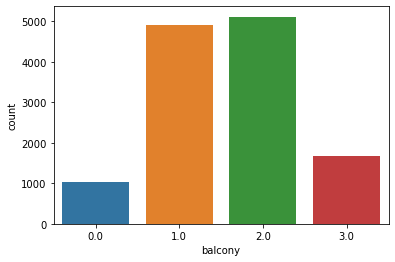

In [15]:
sn.countplot(x='balcony',data=df)
print(df.balcony.value_counts())

In [16]:
balcony=df['balcony'].interpolate(method='pad')
print(balcony.value_counts())
balcony.unique()

2.0    5355
1.0    5114
3.0    1769
0.0    1082
Name: balcony, dtype: int64


array([1., 3., 2., 0.])

In [17]:
#second option
balcony1=df['balcony'].interpolate(method='nearest')
print(balcony1.value_counts())

2.0    5357
1.0    5111
3.0    1768
0.0    1084
Name: balcony, dtype: int64


In [18]:
print(df.balcony.mean())
print(df.balcony.median())

1.5843757375501535
2.0


<h3 style="color:green" > Filling nan values ↓

In [19]:
df.bath=df['bath'].interpolate(method='pad')
df.balcony=df['balcony'].interpolate(method='pad')
df.size=df['size'].interpolate(method='pad')
df['location'].dropna(axis=0,inplace=True)

In [20]:
df.shape

(13320, 8)

In [21]:
# first we have to remove BHK from size colum
df.isnull().sum()

area_type       0
availability    0
location        1
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [22]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [23]:
len(df['size'].values)

13320

In [24]:
df['size'].isnull().sum()

0

In [25]:
size=[int(i[0]) for i in df['size'].values]

len(size)
size[:5]

[2, 4, 3, 3, 2]

In [26]:
df['size']=size

In [27]:
df.head(5)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200,2.0,1.0,51.00


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13320 non-null  int64  
 4   total_sqft    13320 non-null  object 
 5   bath          13320 non-null  float64
 6   balcony       13320 non-null  float64
 7   price         13320 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 832.6+ KB


### lets handle bath 

In [29]:
df.bath.dtype

dtype('float64')

In [30]:
df.bath.isnull().sum()

0

In [31]:
print(df.bath.median())
df.bath.mean()

2.0


2.6917417417417417

In [32]:
df.bath.value_counts()

2.0     6950
3.0     3303
4.0     1232
1.0      792
5.0      526
6.0      275
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
18.0       1
40.0       1
15.0       1
14.0       1
Name: bath, dtype: int64

In [33]:
bath1=df['bath'].interpolate(method='pad')
print(bath1.value_counts())

2.0     6950
3.0     3303
4.0     1232
1.0      792
5.0      526
6.0      275
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
18.0       1
40.0       1
15.0       1
14.0       1
Name: bath, dtype: int64


In [34]:
bath1=df['bath'].interpolate(method='nearest')
print(bath1.value_counts())

2.0     6950
3.0     3303
4.0     1232
1.0      792
5.0      526
6.0      275
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
18.0       1
40.0       1
15.0       1
14.0       1
Name: bath, dtype: int64


In [35]:
df.isnull().sum()

area_type       0
availability    0
location        1
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [36]:
df.location.isnull().sum()

1

In [37]:
import seaborn as sn

<h3 style="color:green" > total_sqft  have some values like '1100-1200' , so i am picking 1100 from that.

In [38]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

<h3 style="color:green" > But first we have to convert that object dtype into numeric 

In [39]:
sqft=pd.to_numeric(df.total_sqft,errors='coerce')

In [40]:
df.total_sqft=sqft

In [41]:
df.total_sqft.isnull().sum()

247

In [42]:
df.total_sqft=df.total_sqft.interpolate(method='nearest')
df.total_sqft.isnull().sum()

0

In [43]:
df.total_sqft.unique()

array([1056., 2600., 1440., ..., 2758.,  774., 4689.])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13320 non-null  int64  
 4   total_sqft    13320 non-null  float64
 5   bath          13320 non-null  float64
 6   balcony       13320 non-null  float64
 7   price         13320 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 832.6+ KB


In [45]:
# #method 2
# sq=[i.split('-') for i in df.total_sqft.values]
# #sq[:]
# sqq=[i[0][:4] for i in sq]
# #sqq[:]
# df1.total_sqft=[int(i)for i in sqq]
# df.head(5)

In [46]:
df.location.isnull().sum()

1

In [47]:
df.shape

(13320, 8)

In [48]:
df=df.dropna()
df.shape

(13319, 8)

In [49]:
df.total_sqft.isnull().sum()

0

In [50]:
df.total_sqft.unique()

array([1056., 2600., 1440., ..., 2758.,  774., 4689.])

In [51]:
# for i in df.total_sqft.unique():
#     print(i)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13319 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13319 non-null  object 
 1   availability  13319 non-null  object 
 2   location      13319 non-null  object 
 3   size          13319 non-null  int64  
 4   total_sqft    13319 non-null  float64
 5   bath          13319 non-null  float64
 6   balcony       13319 non-null  float64
 7   price         13319 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 936.5+ KB


In [53]:
df.corr()

,size,total_sqft,bath,balcony,price
size,1.000000,0.337654,0.786279,0.193544,0.397299
total_sqft,0.337654,1.000000,0.381779,0.136201,0.567742
bath,0.786279,0.381779,1.000000,0.180822,0.454366
balcony,0.193544,0.136201,0.180822,1.000000,0.101723
price,0.397299,0.567742,0.454366,0.101723,1.000000


In [54]:
df.describe()

,size,total_sqft,bath,balcony,price
count,13319.000000,13319.000000,13319.000000,13319.000000,13319.000000
mean,2.779863,1554.275738,2.691719,1.586380,112.567621
std,1.169729,1233.479884,1.339955,0.818962,148.977089
min,1.000000,1.000000,1.000000,0.000000,8.000000
25%,2.000000,1100.000000,2.000000,1.000000,50.000000
50%,3.000000,1274.000000,2.000000,2.000000,72.000000
75%,3.000000,1670.000000,3.000000,2.000000,120.000000
max,9.000000,52272.000000,40.000000,3.000000,3600.000000


In [55]:
df.to_csv("BHP.csv",index=False)

<h3 style="color:green" >  Lets apply quantile range on price column

In [56]:
min_th_pr,max_th_pr=df['price'].quantile([0.001,0.999])
min_th_pr,max_th_pr

(11.158999999999999, 2000.0)

<h3 style="color:green" > lower values outliers ↓

In [62]:
len(df[df['price']<min_th_pr])

14

<h3 style="color:green" >  Too much high value outliers  ↓

In [61]:
len(df[df['price']>max_th_pr])

13

<h3 style="color:green" > Lets remove these Cheap and Expensive Flats ( or remove outliers) ↓

In [59]:
df_new = df[(df['price']<max_th_pr) & (df['price']>min_th_pr)]

In [60]:
print("with outliers shape is :",df.shape)
print("without outliers shape is",df_new.shape)

with outliers : (13319, 8)
without outliers (13290, 8)


In [63]:
df_new.corr()

,size,total_sqft,bath,balcony,price
size,1.000000,0.339466,0.788328,0.191334,0.444930
total_sqft,0.339466,1.000000,0.382727,0.135181,0.558525
bath,0.788328,0.382727,1.000000,0.179363,0.489769
balcony,0.191334,0.135181,0.179363,1.000000,0.105481
price,0.444930,0.558525,0.489769,0.105481,1.000000


In [64]:
df.corr()

,size,total_sqft,bath,balcony,price
size,1.000000,0.337654,0.786279,0.193544,0.397299
total_sqft,0.337654,1.000000,0.381779,0.136201,0.567742
bath,0.786279,0.381779,1.000000,0.180822,0.454366
balcony,0.193544,0.136201,0.180822,1.000000,0.101723
price,0.397299,0.567742,0.454366,0.101723,1.000000
